In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [56]:
data  = pd.read_pickle('./Data/OpenAlex/openalex-data-plosone-2000-2010-train-04.pkl')

In [57]:
data.dropna
data.head()

,id,title,publication_year,countries_distinct_count,institutions_distinct_count,referenced_works_count,cited_by_count,authors_distinct_count,any_author_has_retraction,min_retracted_author_rank,...,has_10pct_retracted_author,top_percentile_retracted_author,frac_author_repeat_offenders,any_institution_has_retraction,min_retracted_institution_rank,has_1pct_retracted_institution,has_5pct_retracted_institution,has_10pct_retracted_institution,top_percentile_retracted_institution,is_retracted
0,https://openalex.org/W2031611770,FastTree 2 – Approximately Maximum-Likelihood ...,2010,1,2,30,10411,3,False,-inf,...,False,0.000000,0.0,True,284.0,False,True,True,95.046385,False
1,https://openalex.org/W2041257508,progressiveMauve: Multiple Genome Alignment wi...,2010,1,2,62,3254,3,False,-inf,...,False,0.000000,0.0,True,257.0,False,True,True,95.518992,False
2,https://openalex.org/W2169773990,Rapid SNP Discovery and Genetic Mapping Using ...,2008,1,1,18,2920,9,False,-inf,...,False,0.000000,0.0,True,843.0,False,False,False,85.261684,False
3,https://openalex.org/W2071754162,Source Partitioning Using Stable Isotopes: Cop...,2010,2,3,24,2321,4,False,-inf,...,False,0.000000,0.0,True,414.5,False,False,True,92.762121,False
4,https://openalex.org/W2135989088,Gut Microbiota in Human Adults with Type 2 Dia...,2010,1,2,36,2293,10,True,4773.5,...,True,88.490293,0.1,True,233.5,False,True,True,95.930334,False


In [58]:
data.columns

Index(['id', 'title', 'publication_year', 'countries_distinct_count',
       'institutions_distinct_count', 'referenced_works_count',
       'cited_by_count', 'authors_distinct_count', 'any_author_has_retraction',
       'min_retracted_author_rank', 'has_1pct_retracted_author',
       'has_5pct_retracted_author', 'has_10pct_retracted_author',
       'top_percentile_retracted_author', 'frac_author_repeat_offenders',
       'any_institution_has_retraction', 'min_retracted_institution_rank',
       'has_1pct_retracted_institution', 'has_5pct_retracted_institution',
       'has_10pct_retracted_institution',
       'top_percentile_retracted_institution', 'is_retracted'],
      dtype='object')

In [59]:
#sns.pairplot(data,
#                y_vars = ['has_1pct_retracted_author', 'has_5pct_retracted_author', 'top_percentile_retracted_author', 'frac_author_repeat_offenders'],
#                x_vars = ['has_1pct_retracted_institution', 'has_5pct_retracted_institution', 'top_percentile_retracted_institution'],
#                hue = 'is_retracted',
#                height = 5)


#plt.show()

In [60]:
retracted = data[data['is_retracted']==True]
retracted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1289 to 15302
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    45 non-null     object 
 1   title                                 45 non-null     object 
 2   publication_year                      45 non-null     object 
 3   countries_distinct_count              45 non-null     object 
 4   institutions_distinct_count           45 non-null     object 
 5   referenced_works_count                45 non-null     object 
 6   cited_by_count                        45 non-null     object 
 7   authors_distinct_count                45 non-null     object 
 8   any_author_has_retraction             45 non-null     bool   
 9   min_retracted_author_rank             45 non-null     float64
 10  has_1pct_retracted_author             45 non-null     bool   
 11  has_5pct_retracted_a

In [61]:
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data[col].astype(int)
    elif col in ['countries_distinct_count', 'institutions_distinct_count', 'referenced_works_count', 'cited_by_count', 'authors_distinct_count']:
        data[col] = data[col].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15809 entries, 0 to 15808
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    15809 non-null  object 
 1   title                                 15809 non-null  object 
 2   publication_year                      15809 non-null  object 
 3   countries_distinct_count              15809 non-null  float64
 4   institutions_distinct_count           15809 non-null  float64
 5   referenced_works_count                15809 non-null  float64
 6   cited_by_count                        15809 non-null  float64
 7   authors_distinct_count                15809 non-null  float64
 8   any_author_has_retraction             15809 non-null  int64  
 9   min_retracted_author_rank             15809 non-null  float64
 10  has_1pct_retracted_author             15809 non-null  int64  
 11  has_5pct_retrac

In [62]:
#data.min(axis=0)

### Preparing Data

Splitting data into train and test set, then normalizing float valued features to have mean 0 and standard deviation 1.

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
features = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'cited_by_count', 'authors_distinct_count', 
            'any_author_has_retraction', 'has_1pct_retracted_author',
            'has_5pct_retracted_author', 'has_10pct_retracted_author',
            'top_percentile_retracted_author',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution', 'is_retracted']

In [65]:
reduced_data = data[features]

In [66]:
X_train, X_test = train_test_split(reduced_data.copy(), test_size = 0.2, random_state=123)

In [67]:
for col in X_train.columns:
    if X_train[col].dtype == float:
        mean = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mean)/std
        X_test[col] = (X_test[col] - mean)/std  

X_train.head() 
X_test.head()
#print(X_train.shape)

,countries_distinct_count,institutions_distinct_count,referenced_works_count,cited_by_count,authors_distinct_count,any_author_has_retraction,has_1pct_retracted_author,has_5pct_retracted_author,has_10pct_retracted_author,top_percentile_retracted_author,frac_author_repeat_offenders,has_1pct_retracted_institution,top_percentile_retracted_institution,is_retracted
457,0.516144,0.779455,0.647844,1.516379,2.086320,0,0,0,0,-0.427455,-0.21894,0,0.459733,0
15248,1.562916,-0.043500,-0.129664,-0.486730,1.633110,0,0,0,0,-0.427455,-0.21894,0,0.207676,0
2895,-0.530628,-0.866456,0.693580,0.222705,0.273478,0,0,0,0,-0.427455,-0.21894,0,0.247215,0
7504,-0.530628,-0.043500,-1.273058,-0.180699,-0.179733,0,0,0,0,-0.427455,-0.21894,0,0.459733,0
5203,-0.530628,-0.866456,-1.227322,-0.041595,-0.859548,0,0,0,0,-0.427455,-0.21894,0,-0.524771,0


### Model

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model  = LogisticRegression(penalty='l2', solver='newton-cg')

In [70]:
np.ravel(y_train).shape

(12647,)

In [71]:
model.fit(X_train, np.ravel(y_train))

LogisticRegression(solver='newton-cg')

In [72]:
(np.sum(np.abs(np.ravel(y_test) - model.predict(X_test)))/y_test.shape[0])

0.0006325110689437065

In [73]:
np.sum(model.predict(X_test)) , np.sum(np.ravel(y_test))

(7, 9)

In [74]:
(np.sum(np.abs(np.ravel(y_train) - model.predict(X_train)))/y_train.shape[0])

0.000395350676049656

In [75]:
np.sum(model.predict(X_train)) , np.sum(np.ravel(y_train))

(31, 36)

In [76]:
model.coef_

array([[ 7.62385877e-02,  8.33433370e-02,  1.32915260e-04,
        -4.94841931e-01,  9.02328689e-02,  9.01083900e-01,
        -8.94750612e-02, -3.18774674e-01, -5.17686380e-01,
         3.75492163e-01,  3.12237136e-01, -2.25156117e-01,
         6.65964456e-02,  6.79807913e+00]])

In [77]:
model.intercept_

array([-8.11318304])

Dominant Features

In [78]:
X_train.columns[3], X_train.columns[5]

('cited_by_count', 'any_author_has_retraction')

### Lasso Regularization

In [79]:
model = LogisticRegression(penalty='l1', solver='liblinear')

In [80]:
model.fit(X_train, y_train)

/Users/jackkendrick/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='liblinear')

In [81]:
(np.sum(np.abs(np.ravel(y_test) - model.predict(X_test)))/y_test.shape[0])

0.0

In [82]:
model.coef_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.61543966e-03, 2.44668768e-01, 0.00000000e+00,
        0.00000000e+00, 1.12523681e+01]])

In [83]:
model.predict_proba(X_test)

array([[9.99855913e-01, 1.44087454e-04],
       [9.99855913e-01, 1.44087454e-04],
       [9.99855913e-01, 1.44087454e-04],
       ...,
       [9.99855913e-01, 1.44087454e-04],
       [9.99855913e-01, 1.44087454e-04],
       [9.99853982e-01, 1.46018259e-04]])

In [84]:
from sklearn.metrics import roc_curve

In [85]:
import matplotlib.pyplot as plt

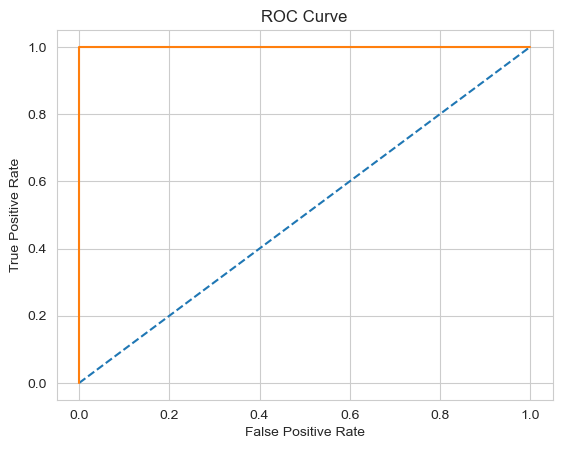

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [90]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

- Baseline model will predict no retraction for all papers. 
- Model 1: Any author retracted, fraction of repeat offenders, any institution in top 1%, and top percentile of institution
- Model 2: Top 1% author, fraction of repeat offenders, any institution in top 1%, and top percentile of institution
- Model 3: Top 5% author, fraction of repeat offenders, any institution in top 1%, and top percentile of institution
- Model 4: Top 10% author, fraction of repeat offenders, any institution in top 1%, and top percentile of institution
- Model 5: Top percentile of authors, fraction of repeat offenders, any institution in top 1%, and top percentile of institution

In [132]:
features = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'cited_by_count', 'authors_distinct_count', 
            'any_author_has_retraction', 'has_1pct_retracted_author',
            'has_5pct_retracted_author', 'has_10pct_retracted_author',
            'top_percentile_retracted_author',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution']

features1 = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'authors_distinct_count', 
            'any_author_has_retraction',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution']
features2 = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'cited_by_count', 'authors_distinct_count', 
            'has_1pct_retracted_author',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution']
features3 = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'cited_by_count', 'authors_distinct_count', 
            'has_5pct_retracted_author',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution']
features4 = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'cited_by_count', 'authors_distinct_count', 
            'has_10pct_retracted_author',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution']
features5 = ['countries_distinct_count', 'institutions_distinct_count', 
            'referenced_works_count', 'cited_by_count', 'authors_distinct_count', 
            'top_percentile_retracted_author',
            'frac_author_repeat_offenders',
            'has_1pct_retracted_institution',
            'top_percentile_retracted_institution']

In [135]:
kfold = KFold(n_splits = 10, shuffle=True, random_state=123)

accuracies = np.zeros((9, 10))

i = 0

for train_index, test_index in kfold.split(X_train):
    X_tt = X_train.iloc[train_index]
    X_val = X_train.iloc[test_index]

    # Baseline Model
    baseline = np.zeros(len(X_val))

    accuracies[0, i] = accuracy_score(X_val.is_retracted, baseline)

    # Model 1

    model  = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt[features1], X_tt.is_retracted.values)

    accuracies[1, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features1]))

    # Model 2

    model  = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt[features2], X_tt.is_retracted.values)

    accuracies[2, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features2]))

    # Model 3

    model  = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt[features3], X_tt.is_retracted.values)

    accuracies[3, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features3]))

    # Model 4

    model  = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt[features4], X_tt.is_retracted.values)

    accuracies[4, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features4]))

    # Model 5 

    model  = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt[features5], X_tt.is_retracted.values)

    accuracies[5, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features5]))

    # Model 6 

    model  = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt[features], X_tt.is_retracted.values)

    accuracies[6, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features]))

    # Model 7

    model = LogisticRegression(penalty='l2', solver='newton-cg')
    model.fit(X_tt['frac_author_repeat_offenders'].values.reshape(-1,1), X_tt.is_retracted.values.reshape(-1,1))

    accuracies[7, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val['frac_author_repeat_offenders'].values.reshape(-1,1)))

    # SVM

    model = SVC(kernel='rbf')
    model.fit(X_tt[features1], X_tt.is_retracted.values)

    accuracies[8, i] = accuracy_score(X_val.is_retracted.values, model.predict(X_val[features1]))

    i +=1

/Users/jackkendrick/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jackkendrick/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jackkendrick/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jackkendrick/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d

In [136]:
print("Baseline Accuracy:", np.mean(accuracies[0,:]))
print("Model 1 Accuracy:", np.mean(accuracies[1,:]))
print("Model 2 Accuracy:", np.mean(accuracies[2,:]))
print("Model 3 Accuracy:", np.mean(accuracies[3,:]))
print("Model 4 Accuracy:", np.mean(accuracies[4,:]))
print("Model 5 Accuracy:", np.mean(accuracies[5,:]))
print("Model 6 Accuracy:", np.mean(accuracies[6,:]))
print("Model 7 Accuracy:", np.mean(accuracies[7,:]))
print("SVM Accuracy:", np.mean(accuracies[8,:]))


Baseline Accuracy: 0.9971530870065543
Model 1 Accuracy: 0.9972322009306049
Model 2 Accuracy: 0.997390116075449
Model 3 Accuracy: 0.9974692299994995
Model 4 Accuracy: 0.9974692299994995
Model 5 Accuracy: 0.9974693550808025
Model 6 Accuracy: 0.9975484064642017
Model 7 Accuracy: 0.9973111897733526
SVM Accuracy: 0.9976273953069494


In [137]:
model  = SVC(kernel='rbf')

model.fit(X_train[features1], X_train.is_retracted.values)

accuracy_score(X_test.is_retracted.values, model.predict(X_test[features1]))

0.997786211258697

In [133]:
model  = LogisticRegression(penalty='l2', solver='newton-cg')
model.fit(X_train[features1], X_train.is_retracted.values)


LogisticRegression(solver='newton-cg')

In [134]:
model.coef_

array([[0.06712806, 0.16832832, 0.11624601, 0.09311527, 1.69193167,
        0.54579566, 0.08445239, 0.04913872]])

In [131]:
features2[3], features2[5]

('cited_by_count', 'has_1pct_retracted_author')